In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simple-gender-classification/gender.csv


# **IMPORTING LIBRARIES**

In [2]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# **LOADING DATASET**

In [4]:
df = pd.read_csv('/kaggle/input/simple-gender-classification/gender.csv')
df

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Unnamed: 9
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,NaN
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,NaN
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,NaN
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,NaN
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,NaN
...,...,...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Associate's Degree,Single,60000,Orange,NaN
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black,NaN
128,female,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green,NaN
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow,NaN


In [5]:
#Checking for null values
df.isnull().any()

 Gender             False
 Age                False
 Height (cm)        False
 Weight (kg)        False
 Occupation         False
 Education Level    False
 Marital Status     False
 Income (USD)       False
 Favorite Color     False
Unnamed: 9           True
dtype: bool

# **DELETING NAN COLUMN IN DATAFRAME**

In [6]:
del df['Unnamed: 9']

# **FINDING CATEGORIES IN GENDER PARAMETER**

In [7]:
print(df[' Gender'].value_counts(ascending=True))

 female    24
 male      27
female     39
male       41
Name:  Gender, dtype: int64


You can see Gender has two categories of male and two categories of female (a problem). This can be seen in EDA part as well.

# **EXPLORATORY DATA ANALYSIS**

In [8]:
# Male Female at various ages in different jobs
fig = px.bar(df, x=' Occupation', y=' Age',
             hover_data=[' Gender'], color=' Age',
             labels={' Gender':'Male or Female'}, height=500)
fig.show()

In [9]:
fig = px.scatter(df, y=" Age", x=" Marital Status", color=" Marital Status", symbol=" Marital Status")
fig.update_traces(marker_size=10)

In [10]:
fig = px.scatter(df, y=" Age", x=" Marital Status", color=" Gender", symbol=" Marital Status")
fig.update_traces(marker_size=10)

<AxesSubplot:xlabel=' Gender', ylabel='count'>

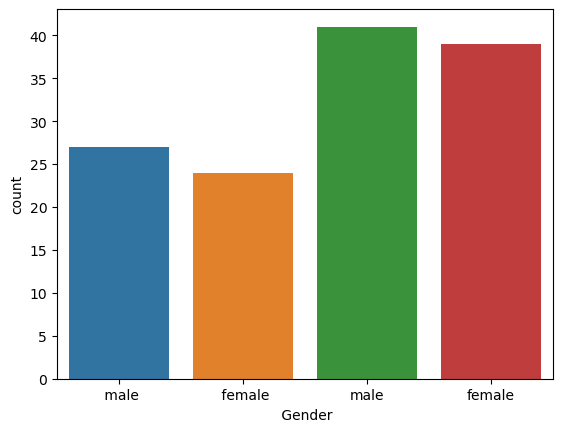

In [11]:
sns.countplot(x =' Gender', data = df)

<AxesSubplot:xlabel=' Age', ylabel=' Income (USD)'>

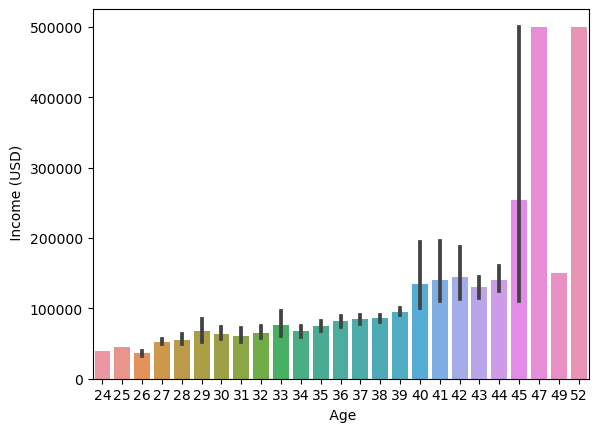

In [12]:
sns.barplot(x=" Age",y=" Income (USD)",data=df)

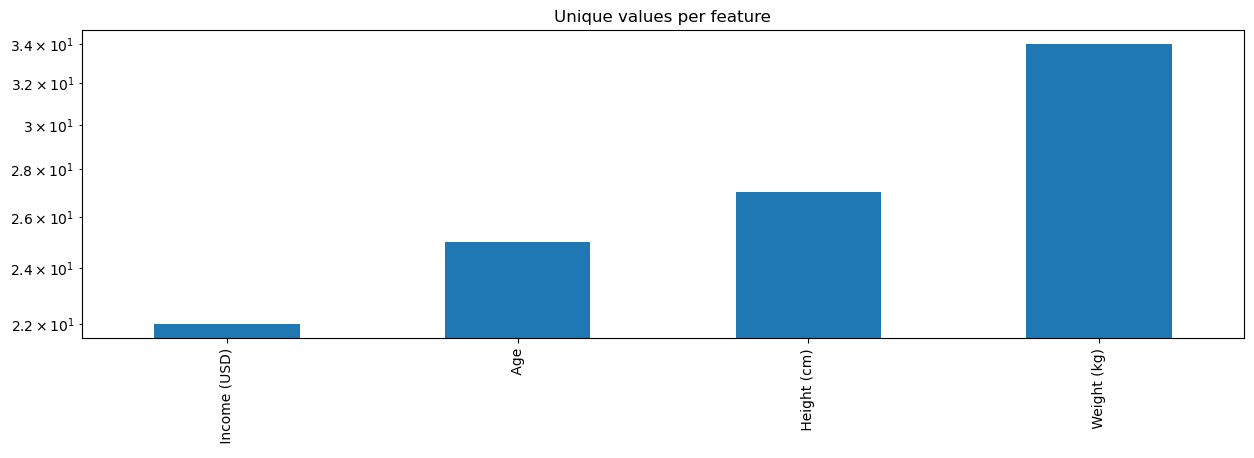

In [13]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

<AxesSubplot:xlabel=' Favorite Color', ylabel='count'>

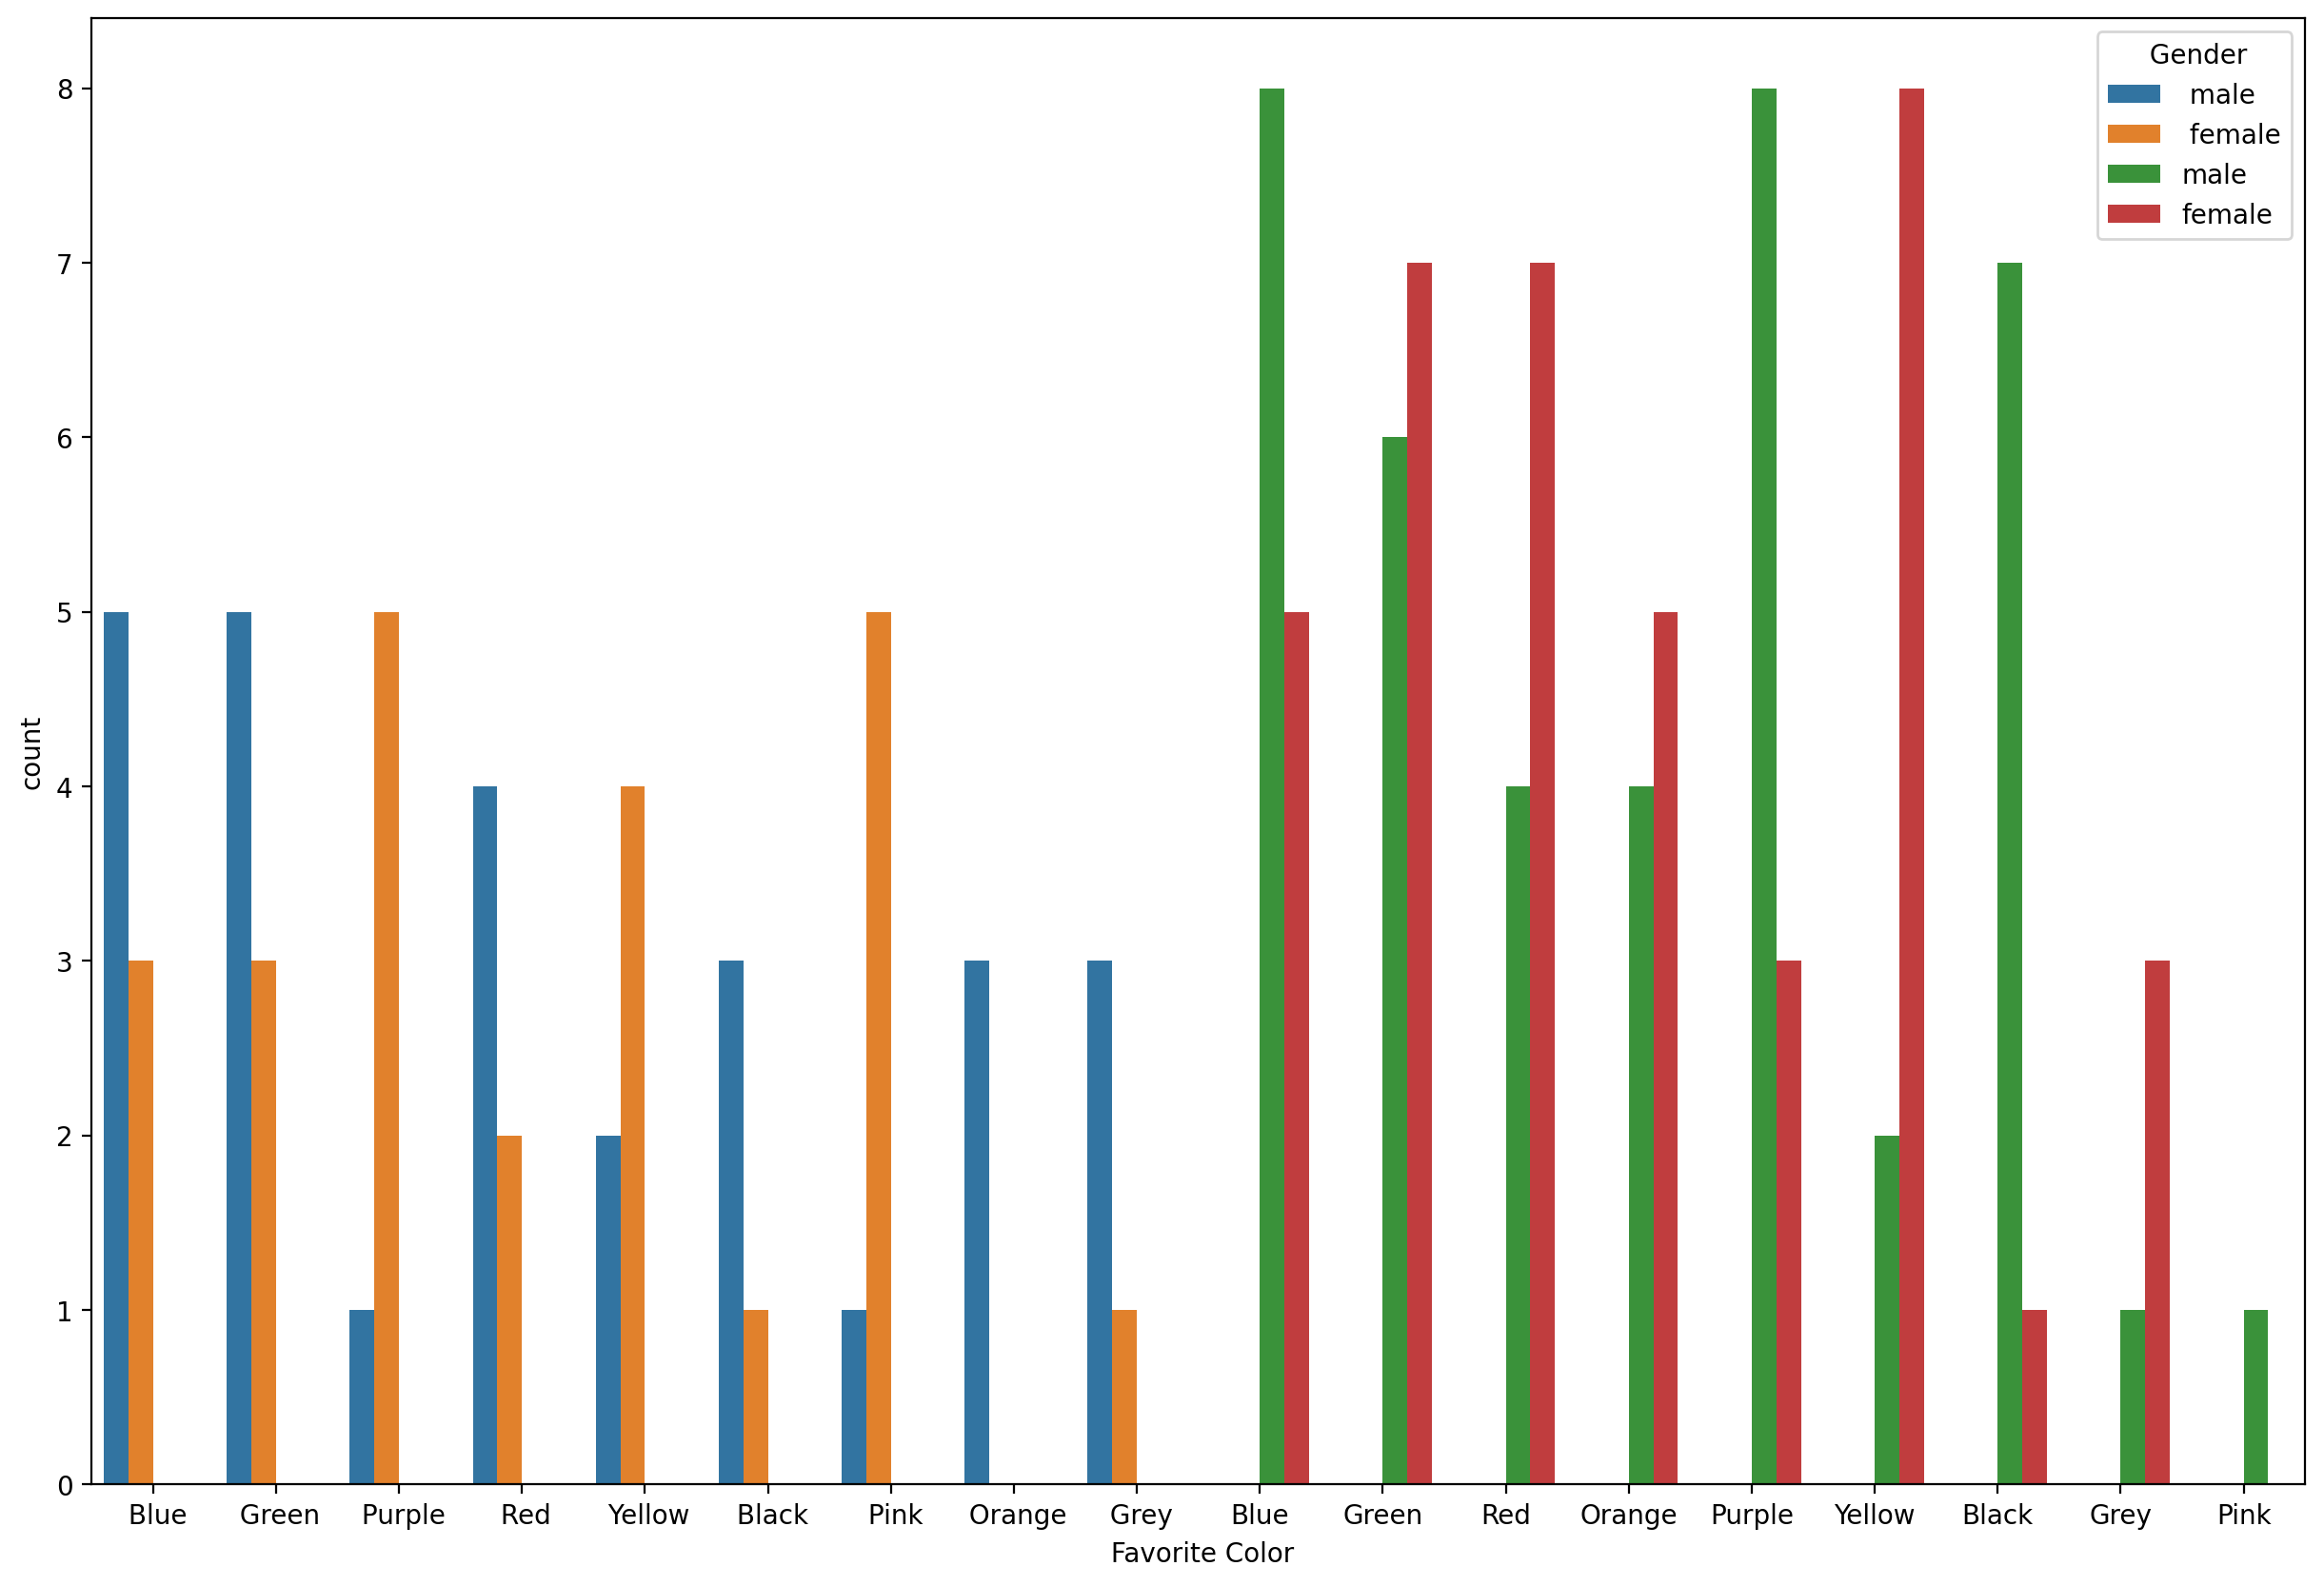

In [14]:
plt.figure(figsize=(15,10),dpi=200)
sns.countplot(data = df,x=" Favorite Color",hue=" Gender")

<AxesSubplot:>

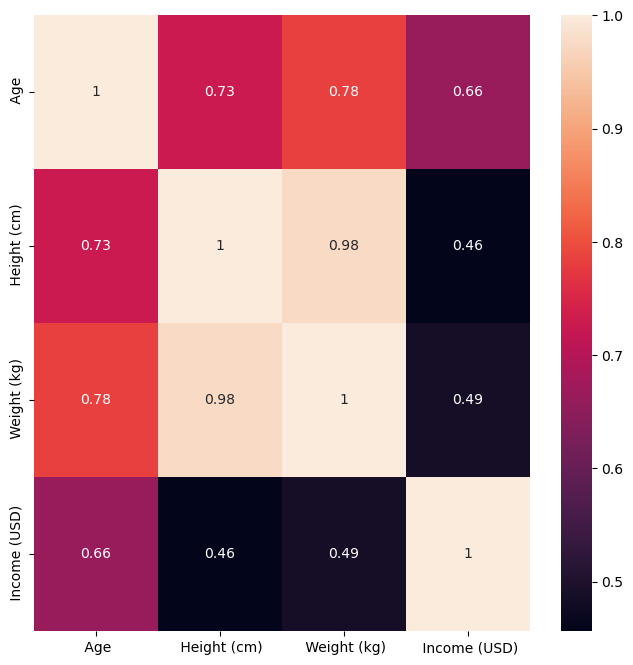

In [15]:
plt.figure(figsize=[8,8])
sns.heatmap(df.corr(),annot=True)

# **LABEL ENCODING**

In [16]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):
    for c in df.columns:
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [17]:
df=labelencoder(df.copy())
display(df)

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,1,32,175,70,15,3,1,75000,1
1,1,25,182,85,14,1,2,45000,2
2,0,41,160,62,6,2,1,120000,6
3,1,38,178,79,10,1,2,90000,7
4,0,29,165,58,8,0,2,35000,8
...,...,...,...,...,...,...,...,...,...
126,2,32,170,64,29,4,6,60000,13
127,3,38,176,79,30,5,5,90000,9
128,2,27,162,55,25,4,6,55000,11
129,3,33,175,77,31,5,5,80000,17


# **SPLITTING INTO INDEPENDENT AND DEPENDENT VARIABLES**

In [18]:
#dependent variable
y=df[' Gender']
y

0      1
1      1
2      0
3      1
4      0
      ..
126    2
127    3
128    2
129    3
130    2
Name:  Gender, Length: 131, dtype: int64

In [19]:
#independent variable
X=df.drop(columns=' Gender',axis=1)
X.head()

,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,32,175,70,15,3,1,75000,1
1,25,182,85,14,1,2,45000,2
2,41,160,62,6,2,1,120000,6
3,38,178,79,10,1,2,90000,7
4,29,165,58,8,0,2,35000,8


# **SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA**

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#0.3 indicates 30% test dataset and remaining 70% training dataset which is ideal size of dataset for ml algorithms training and testing 

# **GENDER CLASSIFICATION**

In [21]:
def classify(model):
    model.fit(X_train, y_train)
    print('Accuracy:', model.score(X_train, y_train))

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=3000)
classify(model)

Accuracy: 1.0


In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 1.0


In [24]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()  
classify(model)

Accuracy: 1.0


In [25]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 1.0


In [26]:
y_pred = model.predict(X_test)
y_pred

array([[0],
       [3],
       [3],
       [2],
       [3],
       [1],
       [1],
       [0],
       [2],
       [1],
       [2],
       [1],
       [1],
       [3],
       [0],
       [1],
       [3],
       [3],
       [0],
       [3],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [2],
       [2],
       [2],
       [0],
       [3],
       [2],
       [1],
       [3],
       [3],
       [0],
       [1],
       [2],
       [3],
       [2]])

In [27]:
y_test

8      0
61     3
90     3
106    2
71     3
30     1
44     1
33     0
60     2
26     1
78     2
7      1
22     1
127    3
10     0
48     1
105    3
92     3
2      0
59     3
52     2
76     2
24     1
51     3
50     1
40     1
85     2
118    2
68     2
16     0
96     3
122    2
13     1
63     3
100    3
45     0
15     1
93     2
125    3
97     2
Name:  Gender, dtype: int64